In [1]:
import os
import glob
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from ipywidgets import interact


In [2]:
image_path_list = glob.glob('02000/*.png')
len(image_path_list)

1000

In [3]:
def imshow(img, rgb=False, figsize = (12,4)):
    plt.figure(figsize = figsize)
    
    if type(img) == list:
        img_list = []
        for i in img:
            if len(i.shape) == 2:
                i = cv2.cvtColor(i, cv2.COLOR_GRAY2BGR)
            img_list.append(i)
        img = cv2.hconcat(img_list)
    cmap = 'viridis'
    if len(img.shape) == 2:
        cmap = 'gray'
    if rgb:
        pass
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



    plt.imshow(img, cmap = cmap)
    plt.axis('off')
    plt.show()

In [4]:
def pencil_sketch(img, sigma=3):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), sigma) # 밝은 곳은 더 밝게 어두운 곳은 더 어둡게 해야 스케치스러운 느낌을 받을 수 있다
    dst = cv2.divide(gray, blr, scale=255) # 흑백영상을 블러로 나눈 값을 255로 곱함.
    return dst

In [5]:
def mask_up_sketch(img, sketch):
    mask = np.where(sketch< 255, 1, 0)
    mask_rgb = np.dstack([mask,mask,mask])
    res = np.where(mask_rgb, img, 255).astype(np.uint8)
    return res

In [6]:
# PATH = "02000"
def get_random_pencil_img(img = None, root = '02000', idx = None, sigma=3):
    if img is None:
        # print('input is image')
        img_path_list = glob.glob(os.path.join(root, "*.png"))
        # len(img_path_list)
        if idx is None:
            rnd_idx = random.randrange(len(img_path_list))
        else:
            rnd_idx = idx
        # rnd_idx
        img = cv2.imread(img_path_list[rnd_idx])

#     imshow(img)
    img_pencil = pencil_sketch(img, sigma=sigma)
#     imshow(img_pencil, rgb=True)

    return img, img_pencil

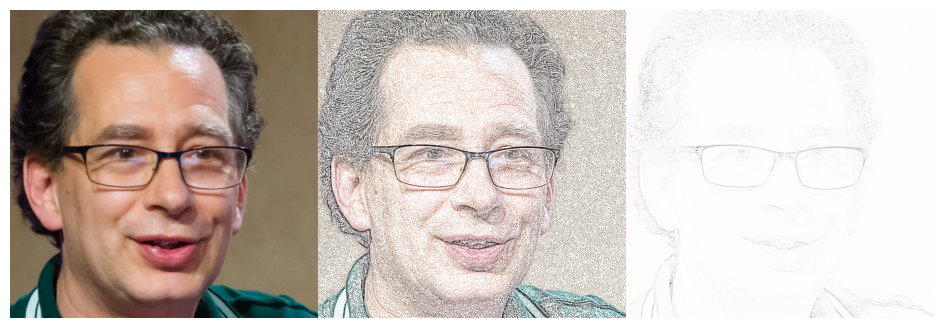

In [7]:
img, img_pencil = get_random_pencil_img(idx=200, sigma = 1)
imshow([img, mask_up_sketch(img, img_pencil), img_pencil], rgb=False, figsize=(12,4))

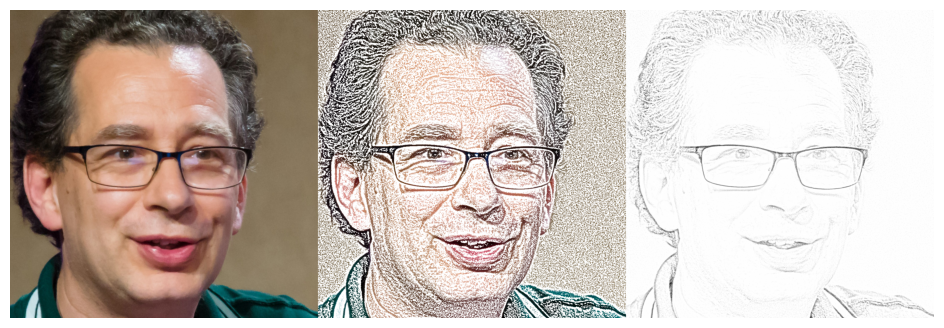

In [8]:
img, img_pencil = get_random_pencil_img(idx=200, sigma = 3)
imshow([img, mask_up_sketch(img, img_pencil), img_pencil], rgb=False, figsize=(12,4))

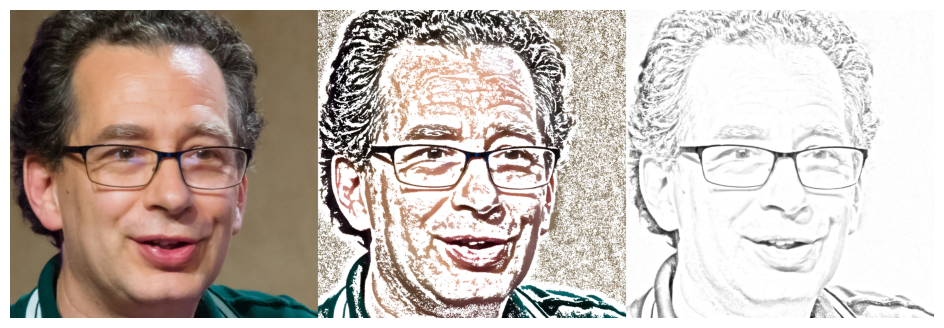

In [9]:
img, img_pencil = get_random_pencil_img(idx=200, sigma = 10)
imshow([img, mask_up_sketch(img, img_pencil), img_pencil], rgb=False, figsize=(12,4))

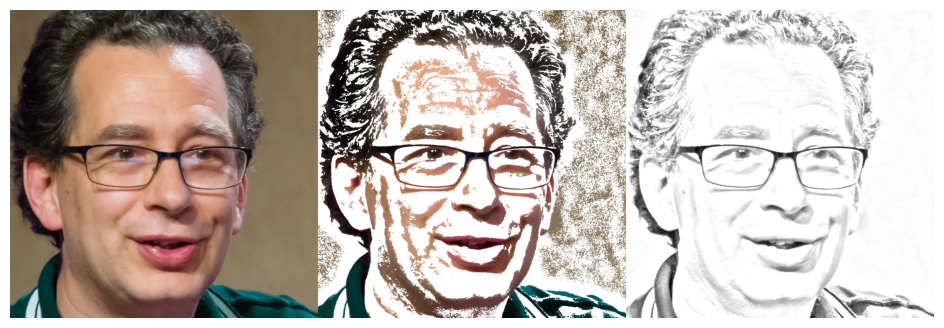

In [10]:
img, img_pencil = get_random_pencil_img(idx=200, sigma = 20)
imshow([img, mask_up_sketch(img, img_pencil), img_pencil], rgb=False, figsize=(12,4))

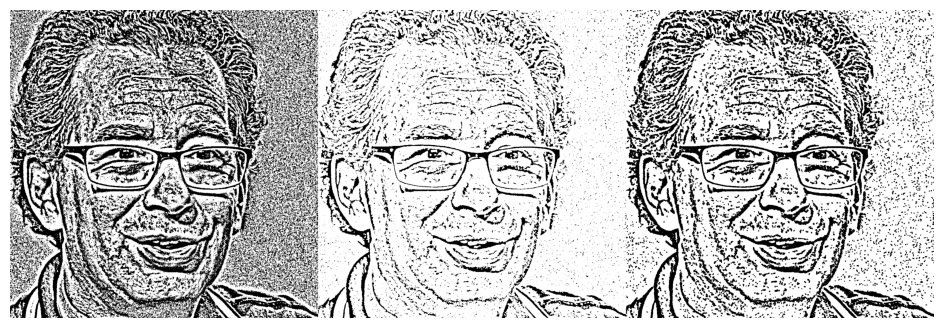

In [43]:
img, img_pencil = get_random_pencil_img(idx=200, sigma = 5)
img_pencil = np.where(img_pencil==255, 255, 0).astype(np.uint8)

kernel = np.ones((3, 3), np.uint8)
t1 = cv2.dilate(img_pencil, kernel, 3 )
t2 = cv2.erode(t1, kernel, 3 )
imshow([img_pencil, t1, t2], rgb=False, figsize=(12,4))
# imshow(t1)

In [41]:
# 노이즈 영역 검출
contours, _ = cv2.findContours(t1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 노이즈 영역 수 출력
noise_count = len(contours)
print("노이즈 영역 수:", noise_count)

노이즈 영역 수: 28


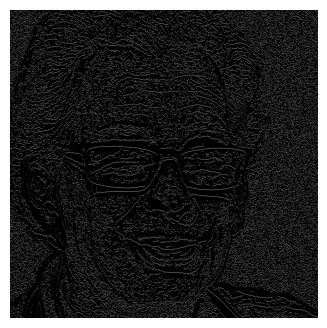

In [27]:
imshow((t1 - t2)*20)

In [44]:
# 이미지를 불러옵니다.
image = cv2.imread('02000/02000.png')

# 이미지를 그레이스케일로 변환합니다.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Haar Cascade 분류기를 로드합니다.
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 얼굴 검출을 수행합니다.
faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# 검출된 얼굴 영역을 순회하며 머리카락을 검출합니다.
for (x, y, w, h) in faces:
    # 검출된 얼굴 영역에서 머리카락을 검출하는 추가 작업을 수행하세요.
    # 예를 들어, Canny 엣지 검출, 허프 변환 등을 사용할 수 있습니다.
    # 이 예제에서는 머리카락을 사각형으로 표시하도록 하겠습니다.
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 결과 이미지를 출력합니다.
# cv2.imshow('Hair Detection', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
imshow(image)